In [1]:
#%pip install geobr
#%pip install geopandas
#%pip install h3
#%pip install h3pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geobr
import lxml
import descartes
from shapely import wkt
import geopandas as gpd
import h3
from IPython.display import IFrame
import h3pandas

import warnings
warnings.filterwarnings("ignore")

# DATUM

<AxesSubplot:>

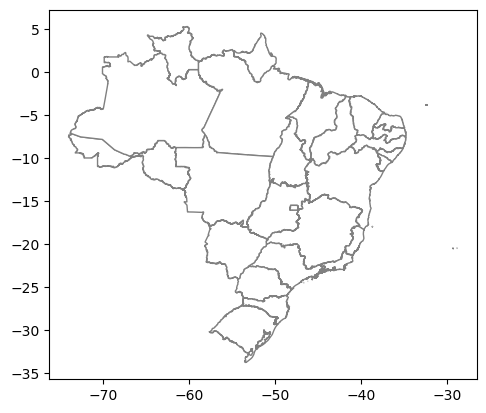

In [3]:
shape_br = gpd.read_file("./BR_UF_2020/BR_UF_2020.shp")
shape_br.plot(facecolor = "white", edgecolor = "gray")

In [4]:
shape_br.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

https://geopandas.org/en/stable/docs/user_guide/projections.html

In [5]:
shape_br2 = shape_br.copy()
shape_br2 = shape_br2.to_crs("EPSG:3395")
shape_br2.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

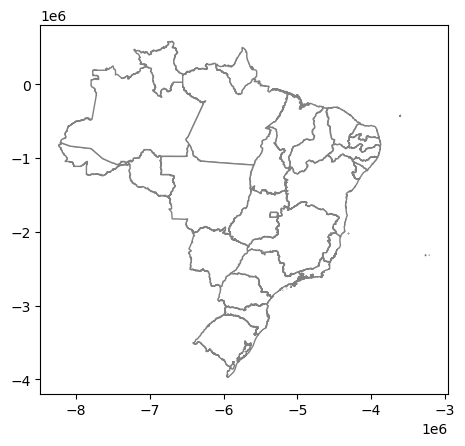

In [6]:
shape_br2.plot(facecolor = "white", edgecolor = "gray")

In [7]:
shape_br3 = shape_br.copy()
shape_br3 = shape_br3.to_crs("EPSG:32633")
shape_br3.crs

<Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°E and 18°E, northern hemisphere between equator and 84°N, onshore and offshore. Austria. Bosnia and Herzegovina. Cameroon. Central African Republic. Chad. Congo. Croatia. Czechia. Democratic Republic of the Congo (Zaire). Gabon. Germany. Hungary. Italy. Libya. Malta. Niger. Nigeria. Norway. Poland. San Marino. Slovakia. Slovenia. Svalbard. Sweden. Vatican City State.
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

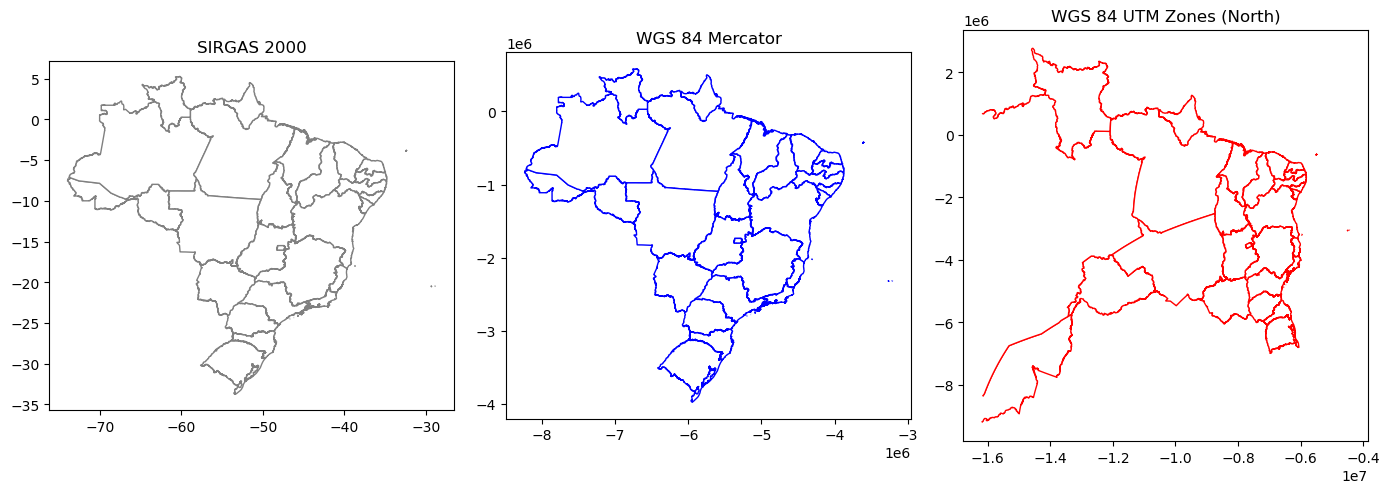

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

shape_br.plot(ax=ax1, facecolor = "white", edgecolor = "gray");
ax1.set_title("SIRGAS 2000");

shape_br2.plot(ax=ax2, facecolor = "white", edgecolor = "blue");
ax2.set_title("WGS 84 Mercator");
plt.tight_layout()

shape_br3.plot(ax=ax3, facecolor = "white", edgecolor = "red");
ax3.set_title("WGS 84 UTM Zones (North)");
plt.tight_layout()

# Join

In [9]:
shape_br.head(2)

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."


<AxesSubplot:>

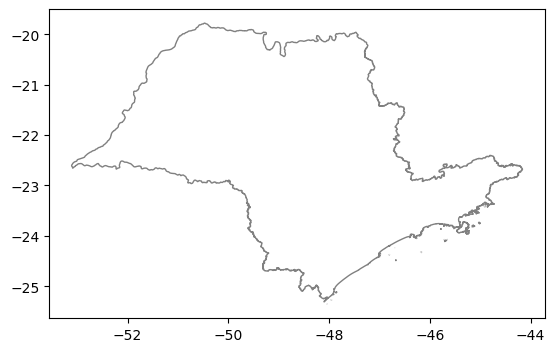

In [10]:
sp = shape_br[shape_br["SIGLA_UF"] == "SP"]
sp.plot(facecolor = "white", edgecolor = "gray")

<AxesSubplot:>

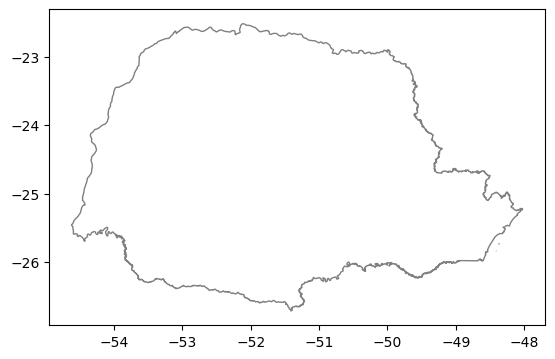

In [11]:
pr = shape_br[shape_br["SIGLA_UF"] == "PR"]
pr.plot(facecolor = "white", edgecolor = "gray")

<AxesSubplot:>

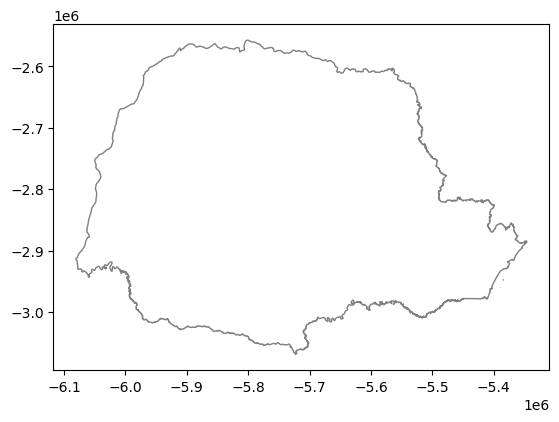

In [12]:
pr2 = shape_br2[shape_br2["SIGLA_UF"] == "PR"]
pr2.plot(facecolor = "white", edgecolor = "gray")

<AxesSubplot:>

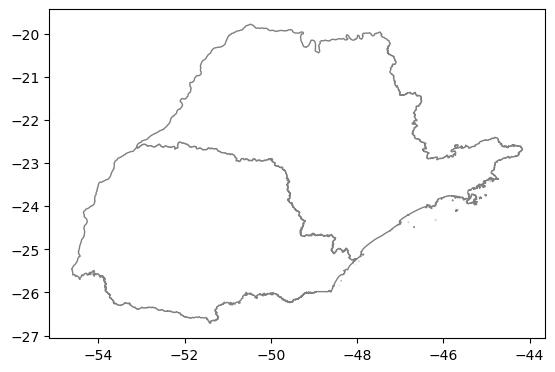

In [13]:
sppr = sp.append(pr)
sppr.plot(facecolor = "white", edgecolor = "gray")

<AxesSubplot:>

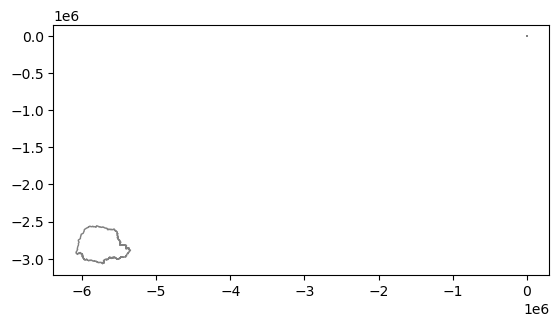

In [14]:
sppr2 = sp.append(pr2)
sppr2.plot(facecolor = "white", edgecolor = "gray")

# GeoBr

https://ipeagit.github.io/geobr/articles/python-intro/py-intro-to-geobr.html

# Listando as bases, shapes

In [16]:
#geobr.list_geobr()

# Extraindo a info

In [17]:
brasil = geobr.read_state(year=2020)
brasil

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.23291 -5.94757, -48.23163 ..."
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ..."
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-42.91509 -6.64795, -42.91636 ..."
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ..."


# Centroid

In [18]:
brasil["lng"] = brasil["geometry"].centroid.x  
brasil["lat"] = brasil["geometry"].centroid.y
brasil

,code_state,abbrev_state,name_state,code_region,name_region,geometry,lng,lat
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013...",-62.841977,-10.913217
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",-70.472930,-9.213271
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",-64.653095,-4.154096
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2...",-61.391906,2.082711
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...",-53.071488,-3.980420
5,16.0,AP,Amapá,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",-51.962021,1.447462
6,17.0,TO,Tocantins,1.0,Norte,"MULTIPOLYGON (((-48.23291 -5.94757, -48.23163 ...",-48.331299,-10.148076
7,21.0,MA,Maranhão,2.0,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...",-45.287773,-5.072211
8,22.0,PI,Piauí,2.0,Nordeste,"MULTIPOLYGON (((-42.91509 -6.64795, -42.91636 ...",-42.970450,-7.389304
9,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ...",-39.615789,-5.093221


(-76.24759047175, -26.590499411249997, -35.70232894755, 7.22299203055)

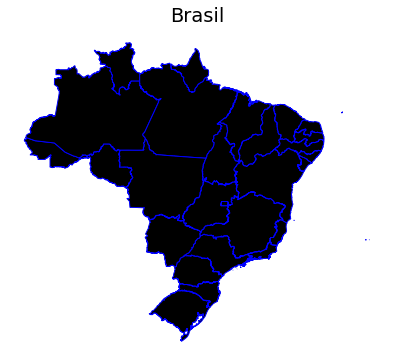

In [19]:
fig, ax = plt.subplots(figsize=(7, 7), dpi = 70)
brasil.plot(facecolor = "black", edgecolor = "blue", ax = ax)
ax.set_title("Brasil", fontsize = 20)
ax.axis("off")

#Add Label

(-76.24759047175, -26.590499411249997, -35.70232894755, 7.22299203055)

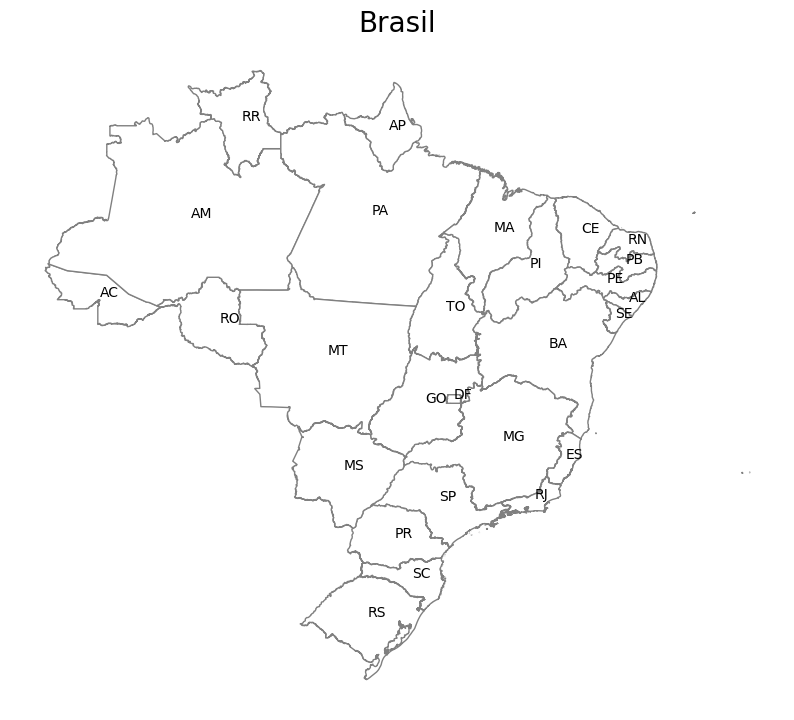

In [20]:
fig, ax = plt.subplots(figsize=(10, 10), dpi = 100)
brasil.plot(facecolor = "white", edgecolor = "gray", ax = ax)
for i in range(0, len(brasil["abbrev_state"])):
    ax.annotate(brasil.iloc[i,1], xytext=(brasil.iloc[i,6],brasil.iloc[i,7]), 
                                xy=(brasil.iloc[i,6],brasil.iloc[i,7]), size=10)
ax.set_title("Brasil", fontsize = 20)
ax.axis("off")

# Agregando infos

😡😡😡😡😡😡😡😡😡😡😡😡😡

In [22]:
df_idh = pd.read_csv("../bases/idhm.csv", encoding = "latin1", sep = ";", decimal = ",")
df_idh.columns = df_idh.columns.str.replace(" ", "")
df_idh.columns

Index(['code_state', 'Territorialidade', 'PosiçãoIDHM', 'IDHM',
       'PosiçãoIDHMRenda', 'IDHMRenda', 'PosiçãoIDHMEducação', 'IDHMEducação',
       'PosiçãoIDHMLongevidade', 'IDHMLongevidade'],
      dtype='object')

## merge

In [23]:
brasil_idh = brasil.merge(df_idh, how = "inner", on = "code_state")
brasil_idh.head(3)

,code_state,abbrev_state,name_state,code_region,name_region,geometry,lng,lat,Territorialidade,PosiçãoIDHM,IDHM,PosiçãoIDHMRenda,IDHMRenda,PosiçãoIDHMEducação,IDHMEducação,PosiçãoIDHMLongevidade,IDHMLongevidade
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013...",-62.841977,-10.913217,Rondônia,18,0.725,23,0.776,16,0.703,13,0.699
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",-70.472930,-9.213271,Acre,20,0.719,12,0.821,18,0.682,22,0.664
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",-64.653095,-4.154096,Amazonas,15,0.733,20,0.786,10,0.735,18,0.682


(-76.24759047175, -26.590499411249997, -31.086411236249997, 7.00318642525)

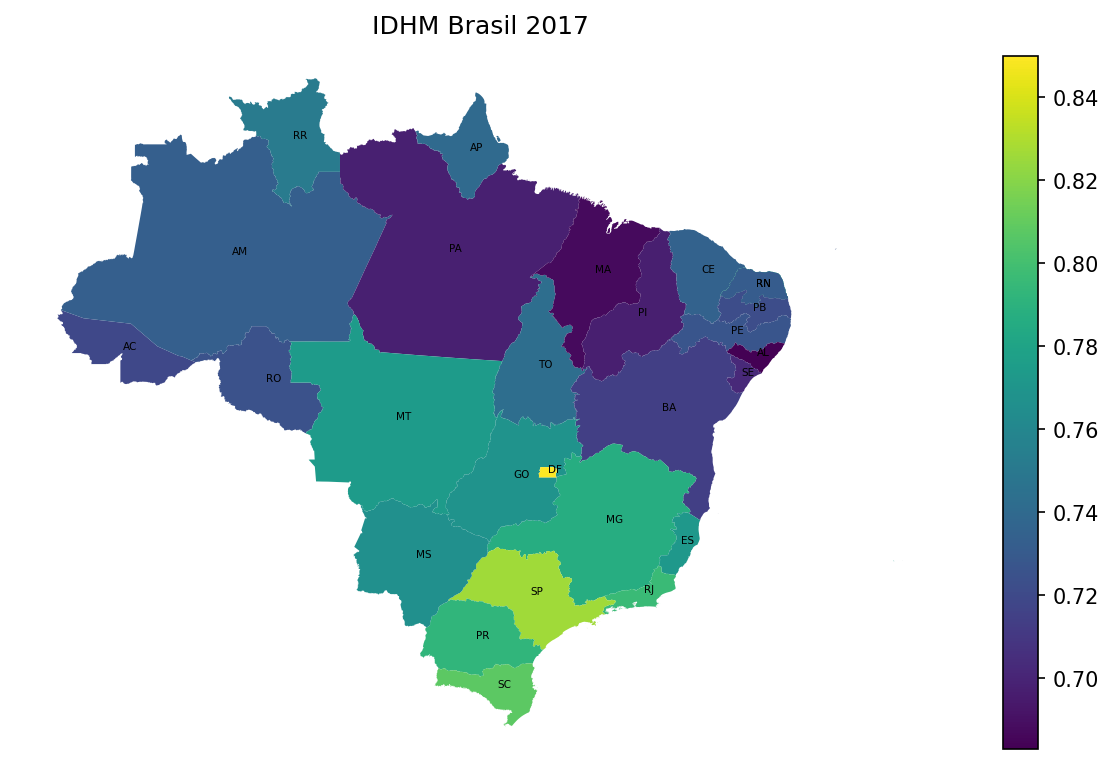

In [24]:
plt.rcParams.update({"font.size": 10})

fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

brasil_idh.plot(
    column = "IDHM",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax,
)
for i in range(0, len(brasil["abbrev_state"])):
  ax.annotate(brasil_idh.iloc[i,1], 
              xytext=(brasil_idh.iloc[i,6],brasil_idh.iloc[i,7]), 
              xy=(brasil_idh.iloc[i,6],brasil_idh.iloc[i,7]), size=5)
  
ax.set_title("IDHM Brasil 2017")
ax.axis("off")

Text(0.5, 1.0, 'IDHM Renda 2017')

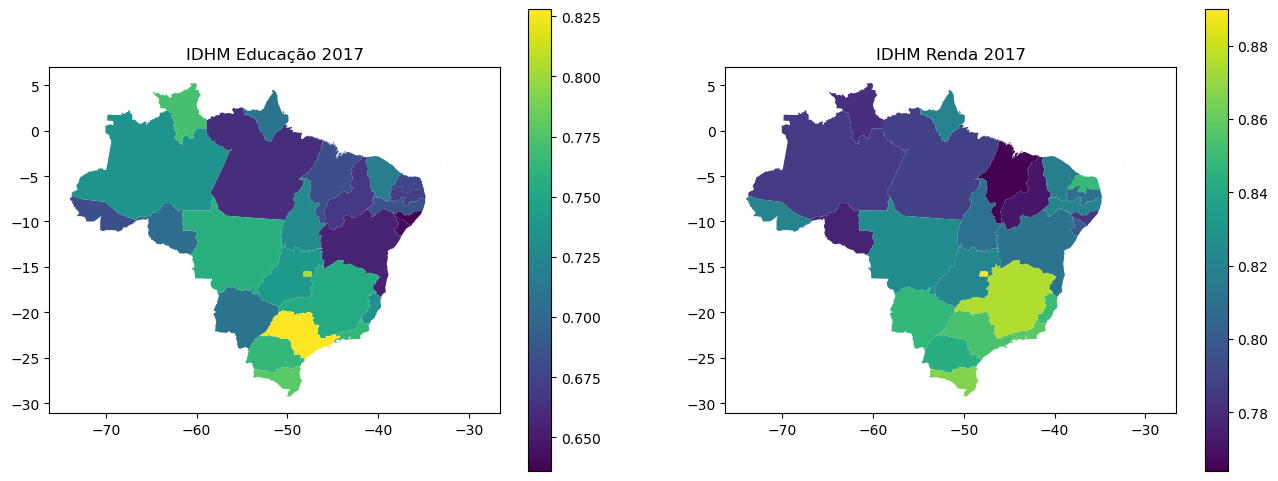

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

brasil_idh.plot(
    column = "IDHMEducação",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax = ax1,
)
brasil_idh.plot(
    column = "IDHMRenda",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax = ax2,
)
ax1.set_title("IDHM Educação 2017")
ax2.set_title("IDHM Renda 2017")

# Para todo o Brasil Setores e H3

In [26]:
geobr.read_census_tract(year = 2010, code_tract = "PR")

,code_tract,zone,code_muni,name_muni,name_neighborhood,code_neighborhood,code_subdistrict,name_subdistrict,code_district,name_district,code_state,geometry
0,410045905000001,URBANO,4100459.0,Altamira Do Paraná,NaN,NaN,4.100459e+10,NaN,410045905.0,Altamira Do Paraná,41.0,"POLYGON ((-52.71440 -24.79812, -52.71285 -24.7..."
1,410045905000002,URBANO,4100459.0,Altamira Do Paraná,NaN,NaN,4.100459e+10,NaN,410045905.0,Altamira Do Paraná,41.0,"POLYGON ((-52.71554 -24.79756, -52.71440 -24.7..."
2,410045905000003,RURAL,4100459.0,Altamira Do Paraná,NaN,NaN,4.100459e+10,NaN,410045905.0,Altamira Do Paraná,41.0,"POLYGON ((-52.72523 -24.79242, -52.72882 -24.7..."
3,410045905000004,RURAL,4100459.0,Altamira Do Paraná,NaN,NaN,4.100459e+10,NaN,410045905.0,Altamira Do Paraná,41.0,"POLYGON ((-52.70253 -24.74792, -52.69807 -24.7..."
4,410045905000005,RURAL,4100459.0,Altamira Do Paraná,NaN,NaN,4.100459e+10,NaN,410045905.0,Altamira Do Paraná,41.0,"POLYGON ((-52.64374 -24.77276, -52.63689 -24.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...
17686,412880705000010,RURAL,4128807.0,Xambrê,NaN,NaN,4.128807e+10,NaN,412880705.0,Xambrê,41.0,"POLYGON ((-53.71599 -23.71752, -53.71571 -23.7..."
17687,412880705000011,RURAL,4128807.0,Xambrê,NaN,NaN,4.128807e+10,NaN,412880705.0,Xambrê,41.0,"POLYGON ((-53.59382 -23.72134, -53.59251 -23.7..."
17688,412880705000012,RURAL,4128807.0,Xambrê,NaN,NaN,4.128807e+10,NaN,412880705.0,Xambrê,41.0,"POLYGON ((-53.65702 -23.65401, -53.65695 -23.6..."
17689,412880705000013,URBANO,4128807.0,Xambrê,NaN,NaN,4.128807e+10,NaN,412880705.0,Xambrê,41.0,"POLYGON ((-53.48696 -23.73322, -53.48552 -23.7..."


In [27]:
ufs = ["AC","AL","AP","AM","BA","CE","DF","ES","GO","MA","MT","MS","MG","PA","PB",
       "PR","PE","PI","RJ","RN","RS","RO","RR","SC","SP","SE","TO"]

df_censo = []

for id, i in enumerate(ufs):
    census_tract = geobr.read_census_tract(year=2010, code_tract = i)
    census_tract["UF"] = i
    df_censo.append(census_tract)
    print(id,i)

final_df_censo = pd.concat(df_censo)
final_df_censo["lng"] = final_df_censo["geometry"].centroid.x  
final_df_censo["lat"] = final_df_censo["geometry"].centroid.y
final_df_censo = final_df_censo[["code_tract","code_muni","zone","name_muni","name_neighborhood",
                                 "name_district","UF","lng","lat","geometry"]]

0 AC
1 AL
2 AP
3 AM
4 BA
5 CE
6 DF
7 ES
8 GO
9 MA
10 MT
11 MS
12 MG
13 PA
14 PB
15 PR
16 PE
17 PI
18 RJ
19 RN
20 RS
21 RO
22 RR
23 SC
24 SP
25 SE
26 TO


In [32]:
#df_censo

In [33]:
final_df_censo

,code_tract,code_muni,zone,name_muni,name_neighborhood,name_district,UF,lng,lat,geometry
0,120020305000030,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.688866,-7.628594,"MULTIPOLYGON (((-72.69164 -7.63101, -72.69449 ..."
1,120020305000031,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.679722,-7.628807,"MULTIPOLYGON (((-72.68007 -7.63158, -72.68148 ..."
2,120020305000032,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.685895,-7.620394,"MULTIPOLYGON (((-72.68701 -7.62252, -72.68771 ..."
3,120020305000033,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.690483,-7.622802,"MULTIPOLYGON (((-72.69267 -7.62117, -72.68917 ..."
4,120020305000034,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.696441,-7.619033,"MULTIPOLYGON (((-72.70299 -7.61553, -72.70113 ..."
...,...,...,...,...,...,...,...,...,...,...
2110,172210705000014,1722107.0,RURAL,Xambioá,NaN,Xambioá,TO,-48.531306,-6.552851,"MULTIPOLYGON (((-48.57029 -6.42075, -48.56667 ..."
2111,172210705000015,1722107.0,RURAL,Xambioá,NaN,Xambioá,TO,-48.584299,-6.541010,"MULTIPOLYGON (((-48.59435 -6.53388, -48.57432 ..."
2112,172210705000016,1722107.0,RURAL,Xambioá,NaN,Xambioá,TO,-48.387928,-6.480301,"MULTIPOLYGON (((-48.41550 -6.51443, -48.42724 ..."
2113,172210705000017,1722107.0,RURAL,Xambioá,NaN,Xambioá,TO,-48.367349,-6.391679,"MULTIPOLYGON (((-48.37530 -6.34675, -48.37257 ..."


## 5.570 municípios
## 314 mil setores censitários.

<AxesSubplot:>

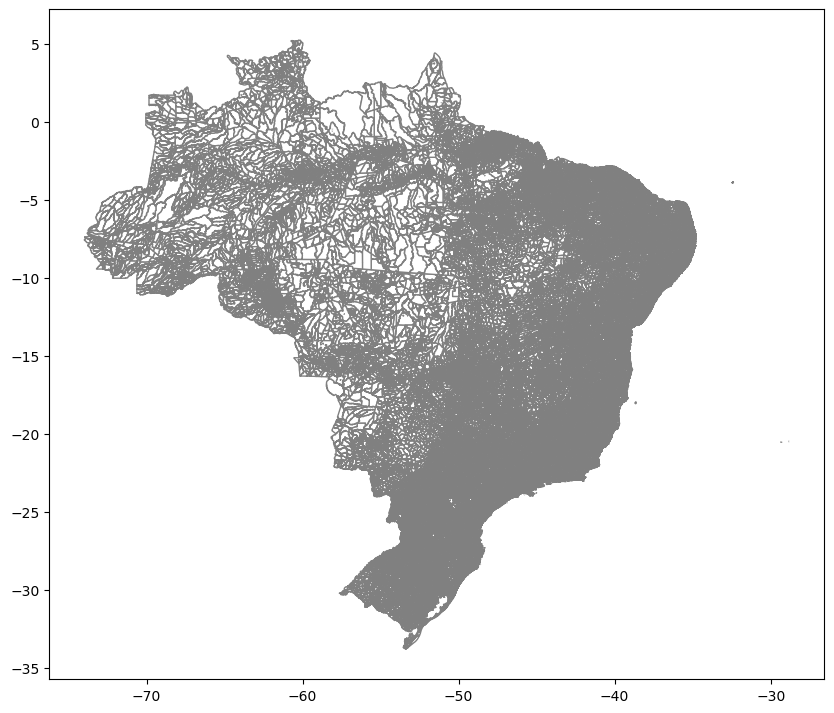

In [34]:
fig, ax = plt.subplots(figsize=(10, 10), dpi = 100)
final_df_censo.plot(facecolor = "white", edgecolor = "gray", ax=ax)

In [35]:
def geo_to_h3_3(row):
    return h3.geo_to_h3(lat = row.lat, lng = row.lng, resolution = 3)

def geo_to_h3_4(row):
    return h3.geo_to_h3(lat = row.lat, lng = row.lng, resolution = 4)

def geo_to_h3_5(row):
    return h3.geo_to_h3(lat = row.lat, lng = row.lng, resolution = 5)

final_df_censo["h3_3"] = final_df_censo.apply(geo_to_h3_3, axis = 1)
final_df_censo["h3_4"] = final_df_censo.apply(geo_to_h3_4, axis = 1)
final_df_censo["h3_5"] = final_df_censo.apply(geo_to_h3_5, axis = 1)

In [36]:
final_df_censo.head(3)

,code_tract,code_muni,zone,name_muni,name_neighborhood,name_district,UF,lng,lat,geometry,h3_3,h3_4,h3_5
0,120020305000030,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.688866,-7.628594,"MULTIPOLYGON (((-72.69164 -7.63101, -72.69449 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff
1,120020305000031,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.679722,-7.628807,"MULTIPOLYGON (((-72.68007 -7.63158, -72.68148 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff
2,120020305000032,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.685895,-7.620394,"MULTIPOLYGON (((-72.68701 -7.62252, -72.68771 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff


# H3 4

In [37]:
gdf_h3 = final_df_censo.set_index("h3_4").h3.h3_to_geo_boundary()

In [38]:
gdf_h3.head(3)

,code_tract,code_muni,zone,name_muni,name_neighborhood,name_district,UF,lng,lat,geometry,h3_3,h3_5
h3_4,,,,,,,,,,,,
848b493ffffffff,120020305000030,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.688866,-7.628594,"POLYGON ((-72.65123 -7.48877, -72.85334 -7.636...",838b49fffffffff,858b4927fffffff
848b493ffffffff,120020305000031,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.679722,-7.628807,"POLYGON ((-72.65123 -7.48877, -72.85334 -7.636...",838b49fffffffff,858b4927fffffff
848b493ffffffff,120020305000032,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.685895,-7.620394,"POLYGON ((-72.65123 -7.48877, -72.85334 -7.636...",838b49fffffffff,858b4927fffffff


(-76.22686640912117, -26.71963481937727, -36.03107115607574, 7.379087524393738)

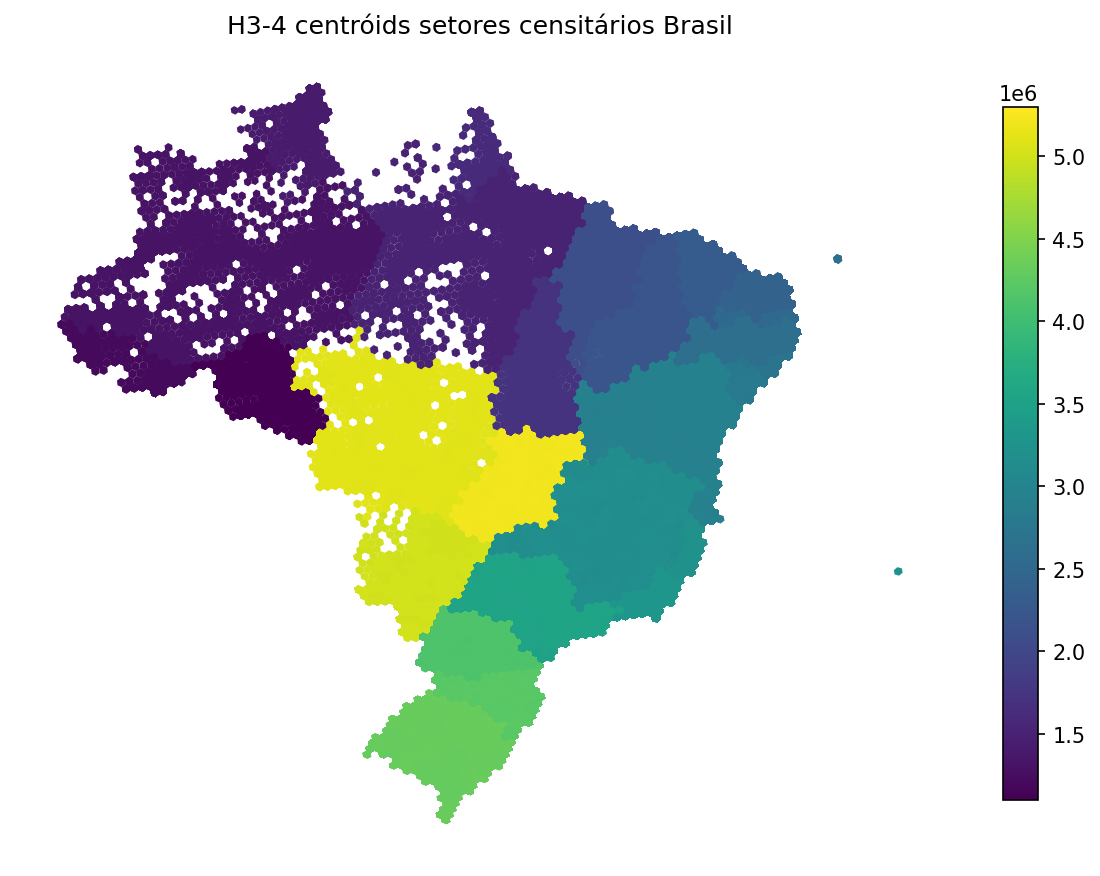

In [39]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

gdf_h3.plot(
    column = "code_muni",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax
)
  
ax.set_title("H3-4 centróids setores censitários Brasil")
ax.axis("off")

# H3 5

(-76.08506572211908,
 -27.025222472633683,
 -35.813315601547416,
 7.286673544037667)

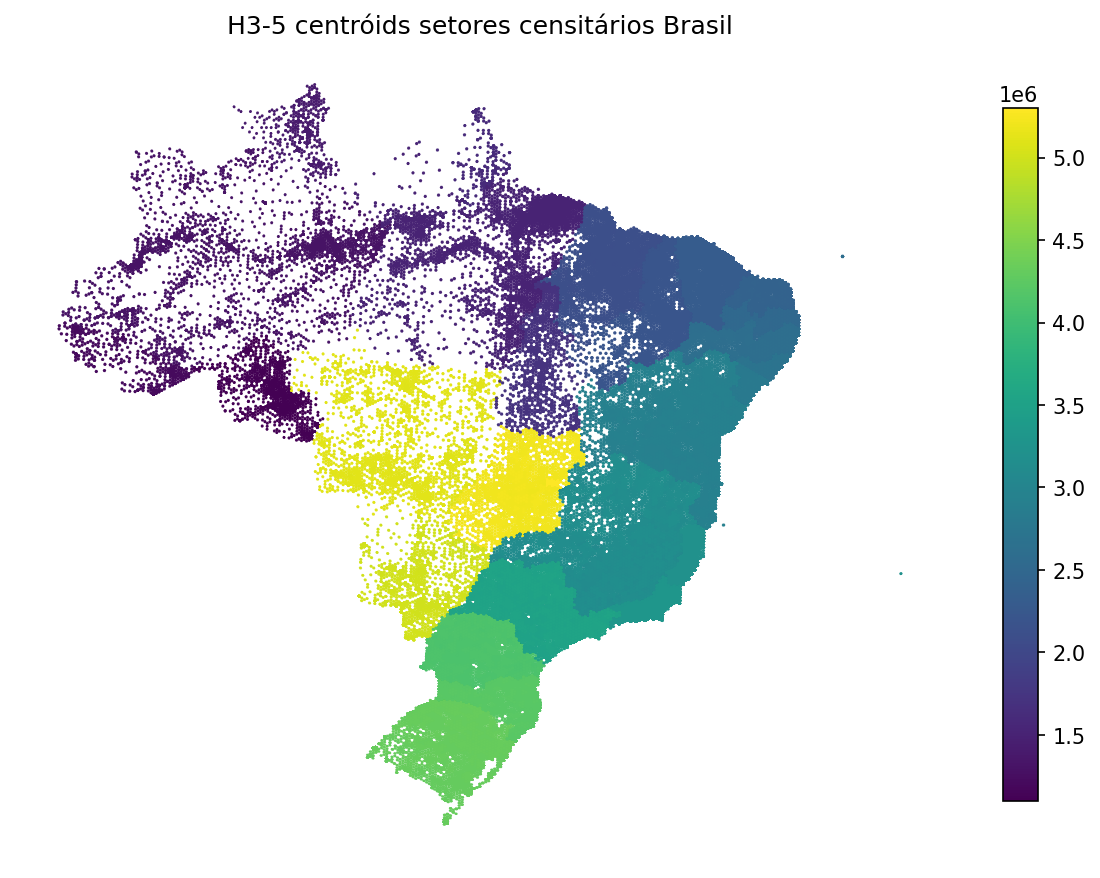

In [40]:
gdf_h3 = final_df_censo.set_index("h3_5").h3.h3_to_geo_boundary()

fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

gdf_h3.plot(
    column = "code_muni",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax
)
  
ax.set_title("H3-5 centróids setores censitários Brasil")
ax.axis("off")

# H3 3

(-76.36624221993472,
 -25.969226650857863,
 -36.35689312327731,
 8.047098048574925)

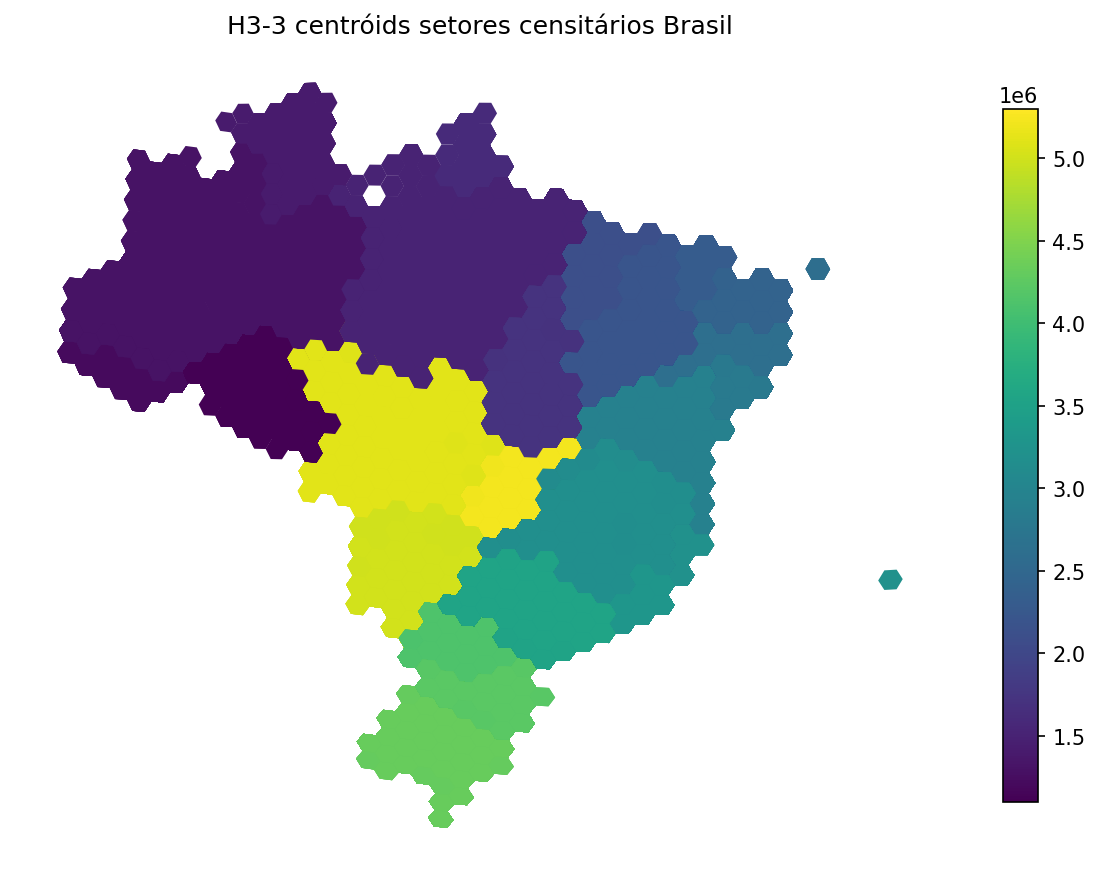

In [41]:
gdf_h3 = final_df_censo.set_index("h3_3").h3.h3_to_geo_boundary()

fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

gdf_h3.plot(
    column = "code_muni",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax
)
  
ax.set_title("H3-3 centróids setores censitários Brasil")
ax.axis("off")

# Sumariza H3

In [42]:
final_df_censo["evento"] = np.random.randint(low = 0, high = 10, size = len(final_df_censo["name_muni"]))
final_df_censo.head(3)

,code_tract,code_muni,zone,name_muni,name_neighborhood,name_district,UF,lng,lat,geometry,h3_3,h3_4,h3_5,evento
0,120020305000030,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.688866,-7.628594,"MULTIPOLYGON (((-72.69164 -7.63101, -72.69449 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff,1
1,120020305000031,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.679722,-7.628807,"MULTIPOLYGON (((-72.68007 -7.63158, -72.68148 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff,1
2,120020305000032,1200203.0,URBANO,Cruzeiro Do Sul,NaN,Cruzeiro Do Sul,AC,-72.685895,-7.620394,"MULTIPOLYGON (((-72.68701 -7.62252, -72.68771 ...",838b49fffffffff,848b493ffffffff,858b4927fffffff,3


In [43]:
def sumariza_h3(base, h3):
    sumar_h3 = (base
                     .groupby(h3)
                     .code_tract
                     .agg(list)
                     .to_frame("ids")
                     .reset_index()
           )

    sumar_ibge_censo_df = (base
                          .groupby(h3)
                          .agg(
                               cidade=("name_muni","max"),
                               uf=("UF","max"),
                               longitude_media=("lng","mean"),
                               latitude_media=("lat","mean"),
                               soma_evento=("evento","sum"),
                               max_evento=("evento","max"),
                          )
                          .reset_index()
                      )
    return(sumar_ibge_censo_df,sumar_h3 )

In [44]:
final_df_censo_h3_3 = sumariza_h3(final_df_censo, "h3_3")

In [45]:
final_df_censo_h3_3[0]

,h3_3,cidade,uf,longitude_media,latitude_media,soma_evento,max_evento
0,835f14fffffffff,Oiapoque,AP,-52.329120,3.167272,2,2
1,835f16fffffffff,Oiapoque,AP,-51.740852,3.729241,146,9
2,835f20fffffffff,Oriximiná,PA,-57.107506,0.548494,3,3
3,835f22fffffffff,Óbidos,PA,-55.822491,1.448120,2,1
4,835f25fffffffff,Oriximiná,PA,-58.132045,0.074317,6,6
...,...,...,...,...,...,...,...
712,83c2d6fffffffff,Santa Vitória Do Palmar,RS,-53.366492,-33.576219,530,9
713,83c2d8fffffffff,Sant'ana Do Livramento,RS,-55.945626,-30.985123,12,5
714,83c2d9fffffffff,Barra Do Quaraí,RS,-57.427612,-30.216529,50,9
715,83c2dafffffffff,Sant'ana Do Livramento,RS,-55.238366,-30.897720,1345,9


In [46]:
final_df_censo_h3_3[1]["len_ids"] = final_df_censo_h3_3[1]["ids"].str.len()
final_df_censo_h3_3[1]

,h3_3,ids,len_ids
0,835f14fffffffff,[160050110000002],1
1,835f16fffffffff,"[160050105000001, 160050105000002, 16005010500...",31
2,835f20fffffffff,[150530405000051],1
3,835f22fffffffff,"[150510605000046, 150530405000053]",2
4,835f25fffffffff,[150530405000044],1
...,...,...,...
712,83c2d6fffffffff,"[430543905000001, 430543905000002, 43054390500...",111
713,83c2d8fffffffff,"[431710307000001, 431710307000002, 43171030700...",4
714,83c2d9fffffffff,"[430187505000001, 430187505000002, 43018750500...",7
715,83c2dafffffffff,"[430660105060015, 430660105060016, 43066010506...",300


(-76.36624221993472,
 -25.969226650857863,
 -36.35689312327731,
 8.047098048574925)

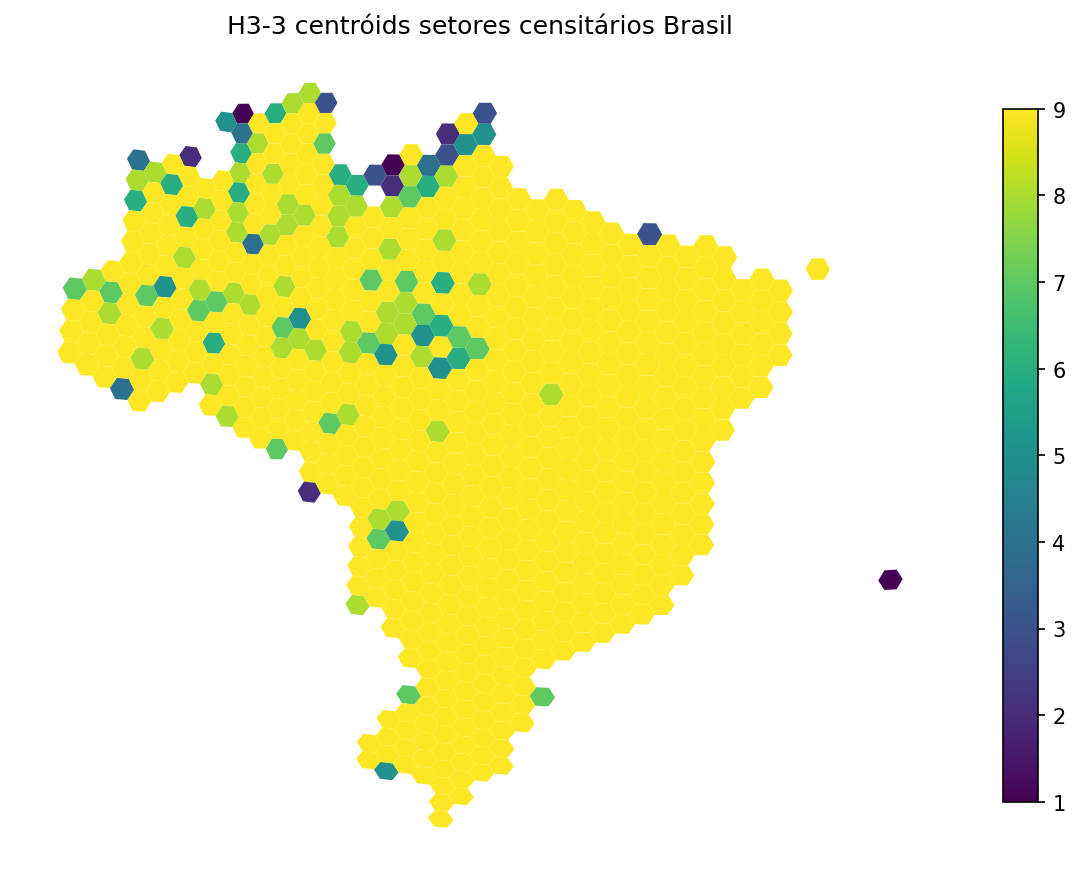

In [47]:
df_censo_h3_3 = final_df_censo_h3_3[0].set_index("h3_3").h3.h3_to_geo_boundary()

fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

df_censo_h3_3.plot(
    column = "max_evento",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax
)
  
ax.set_title("H3-3 centróids setores censitários Brasil")
ax.axis("off")

(-76.36624221993472,
 -25.969226650857863,
 -36.35689312327731,
 8.047098048574925)

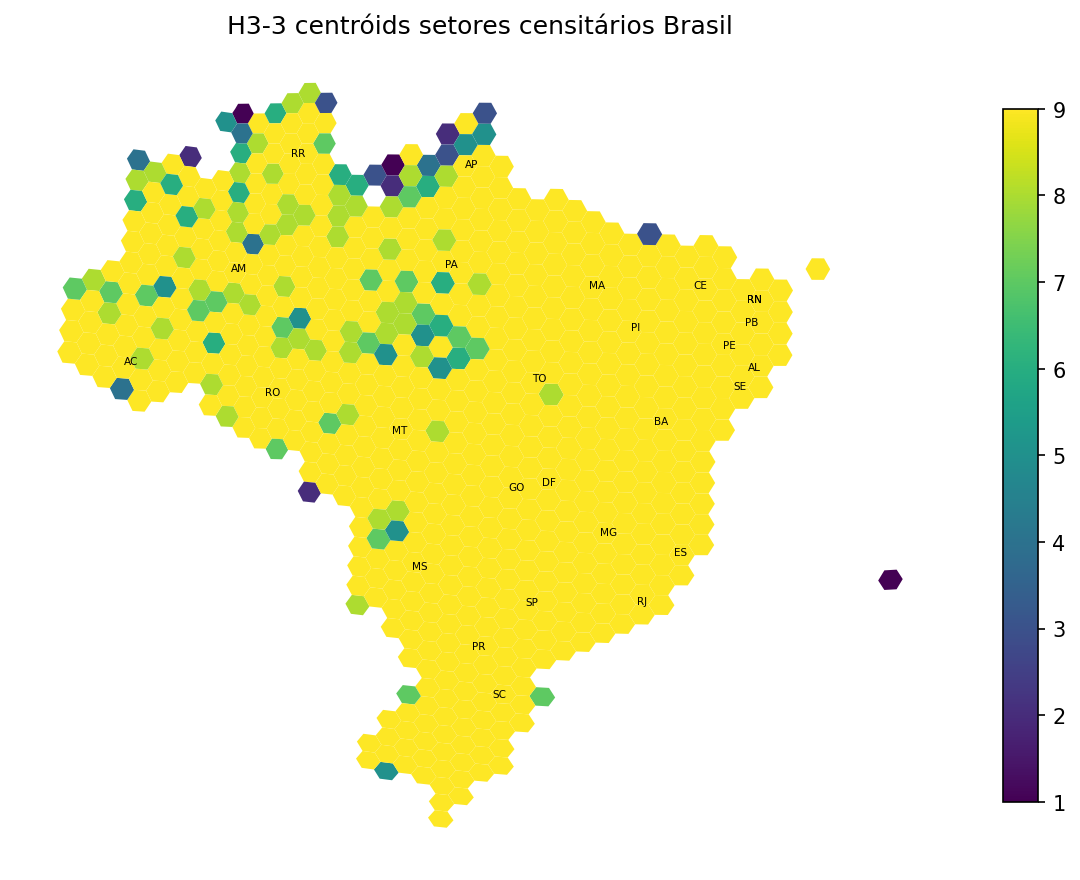

In [48]:
df_censo_h3_3 = final_df_censo_h3_3[0].set_index("h3_3").h3.h3_to_geo_boundary()

fig, ax = plt.subplots(figsize=(10, 10), dpi=150)

df_censo_h3_3.plot(
    column = "max_evento",
    cmap = "viridis",
    legend = True,
    legend_kwds = {
        "orientation": "vertical",
        "shrink": 0.6,
    },
    ax=ax
)
for i in range(0, len(brasil["abbrev_state"])):
    ax.annotate(brasil_idh.iloc[i,1], 
              xytext=(brasil_idh.iloc[i,6],brasil_idh.iloc[i,7]), 
              xy=(brasil_idh.iloc[i,6],brasil_idh.iloc[i,7]), size=5)

ax.set_title("H3-3 centróids setores censitários Brasil")
ax.axis("off")